<a href="https://colab.research.google.com/github/albayo/Ajedrez/blob/main/Parte1_AED_Pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- *Alumno*: 
- *Asignatura*: Ingeniería del Conocimiento
- *Curso*: 2021/2022
- *Profesor*: Fco. Javier Martínez de Pisón
- Universidad de La Rioja

In [1]:
#Intro:
#  Antecedentes 
#  Objetivos
#Desarrollo + Resultados
#Conclusion


SyntaxError: ignored

# AED de la Base de Datos 'Pollution'

Primero vamos a realizar un AED profundo de la base de datos Pollution pero, para no partir de cero, vamos a utilizar como guión el excelente ejemplo creado por Joaquín Amat Rodrigo y disponible en el siguiente enlace:
https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html (de la web http://cienciadedatos.net)  realizar los siguientes ejercicios con la base de datos de *pollution_sin_comentarios.arff*.

El objetivo es realizar un AED lo más profundo posible para poder entender la información suministrada, analizar correlaciones, identificar espurios, para preparar la base de datos lo mejor posible para las futuras tareas de modelizado.

Para ello, se desarrollará un informe en PDF como si fuera a ser presentado a la empresa incluyendo en él todo el código usado, las gráficas, así como un análisis exhaustivo del AED.

El alumno desarrollará con detalle cada uno de los puntos siguientes:

1.	Utilice todos los métodos de estadística descriptiva vistos en clase (*Funciones_AED_Python.ipynb*) para analizar la información. Extraiga también estimaciones robustas de centralidad y dispersión.
2.	Analice la distribución de los datos para cada una de las características usando barplots, histogramas, density-plots y diagramas de cajas (boxplots).
3.	Con toda la información anterior, estudie si hay espurios o datos faltantes. Si es así, realice correcciones en los datos.
4.	Realice un análisis de distribución normal de cada variable usando gráficos Cuantil-Cuantil (QQPlots), pruebas de normalidad así como estadísticos de asimetría (kurtosis, skewness). Apoyarse en: https://www.cienciadedatos.net/documentos/pystats06-analisis-normalidad-python.html
5.	Analice la relación entre las variables con pair-plots y matrices de correlación.
6.	Estudie la correlación de cada variable de entrada con MORT.
7.	Cree una nueva variable categórica denominada MORT_CAT con tres niveles: BAJO (MORT<900), MEDIO (MORT>=900 y MORT<1000), ALTO (MORT>1000).
8.	Realice los siguientes gráficos: coordenadas paralelas, curvas Andrews y dendrogramas con las variables de entrada y usando MORT_CAT para colorear los tres tipos de categorías de mortalidad.
9.	Mediante PCA de las variables de entrada más MORT (no incluir MORT_CAT) identificar grupos de zonas metropolitanas con características similares y aquellas anómalas diferentes a las demás.
10.	Seleccionar cuatro técnicas de proyección entre estas: SOM, t-SNE, IsoMap, UMAP, TriMAP, RADVIZ; para poder determinar cuántos grupos existen, así como los casos anómalos.
11.	Usando clustering jerárquico (dendrogramas) extraer los grupos detectados anteriormente, así como las ciudades con características anómalas.

La nota final del trabajo tendrá en cuenta los siguientes factores: **grado de profundidad de las explicaciones, técnicas usadas, aspecto visual y organización del documento presentado**.

El trabajo se debe llamar así: PROYECTO1_AED_NOMBRE_ALUMNO.PDF (por ejemplo: PROYECTO1_AED_PEPITO_PEREZ.PDF) y se enviará directamente en la plataforma Blackboard. 

**Nota: todos los trabajos serán revisados automáticamente con herramientas anti-plagio como: SafeAssign y Turnitin. Los alumnos que plagien sus trabajos, obtendrán calificación 0 en la asignatura.**




La base de datos tiene las siguientes características:

-	PREC: Precipitación media anual en pulgadas.
-	JANT: Temperatura media de enero en grados Fahrenheit (F). 
-	JULT: Igual que en julio.
-	OVR65: % de la población del SMSA de 1960 de 65 años o más.
-	POPN: Tamaño medio de los hogares.
-	EDUC: Promedio de años de estudio completados por los mayores de 22 años.
-	HOUS: % de unidades de vivienda que son sólidas y con todas las instalaciones.
-	DENS: Población por milla cuadrada en áreas urbanizadas, 1960.
-	NONW: % de población no blanca en áreas urbanizadas, 1960.
-	WWDRK: % de empleados en profesiones de cuello blanco.
-	POOR: % de familias con ingresos inferiores a 3.000 dólares
-	HC: Potencial relativo de contaminación por hidrocarburos.
-	NOX: Igual que los óxidos nítricos.
-	SO@: Igual que el dióxido de azufre.
-	HUMID: Promedio anual de humedad relativa a las 13:00 horas.
-	MORT: Tasa de mortalidad total ajustada por edad por cada 100.000.

Data from StatLib (ftp stat.cmu.edu/datasets)

Source: McDonald, G.C. and Schwing, R.C. (1973) 'Instabilities of regression estimates relating air pollution to mortality', Technometrics, vol.15, 463-482.

## Cargar la Base de Datos

En local, si no se dispone en windows del comando 'wget', el archivo se puede descargar directamente del enlace con el navegador: https://github.com/IC1920/Datasets/raw/master/pollution_sin_comentarios.arff. Incluir el mismo en el directorio donde está almacenado el notebook.

In [2]:
# Funciona en linux y colab
!wget https://github.com/IC1920/Datasets/raw/master/pollution_sin_comentarios.arff -O pollution_sin_comentarios.arff #Funciona en linux

--2022-03-15 16:12:32--  https://github.com/IC1920/Datasets/raw/master/pollution_sin_comentarios.arff
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IC1920/Datasets/master/pollution_sin_comentarios.arff [following]
--2022-03-15 16:12:32--  https://raw.githubusercontent.com/IC1920/Datasets/master/pollution_sin_comentarios.arff
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5340 (5.2K) [text/plain]
Saving to: ‘pollution_sin_comentarios.arff’

pollution_sin_comen 100%[===================>]   5.21K  --.-KB/s    in 0s      

2022-03-15 16:12:32 (55.2 MB/s) - ‘pollution_sin_comentarios.arff’ saved [

In [3]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
from scipy.io import arff

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df_pollution = pd.DataFrame(arff.loadarff("pollution_sin_comentarios.arff")[0])
print(df_pollution.shape)
df_pollution.head()

(60, 16)


,PREC,JANT,JULT,OVR65,POPN,EDUC,HOUS,DENS,NONW,WWDRK,POOR,HC,NOX,SO@,HUMID,MORT
0,36.0,27.0,71.0,8.1,3.34,11.4,81.5,3243.0,8.8,42.6,11.7,21.0,15.0,59.0,59.0,921.870
1,35.0,23.0,72.0,11.1,3.14,11.0,78.8,4281.0,3.5,50.7,14.4,8.0,10.0,39.0,57.0,997.875
2,44.0,29.0,74.0,10.4,3.21,9.8,81.6,4260.0,0.8,39.4,12.4,6.0,6.0,33.0,54.0,962.354
3,47.0,45.0,79.0,6.5,3.41,11.1,77.5,3125.0,27.1,50.2,20.6,18.0,8.0,24.0,56.0,982.291
4,43.0,35.0,77.0,7.6,3.44,9.6,84.6,6441.0,24.4,43.7,14.3,43.0,38.0,206.0,55.0,1071.289


## Análisis Exploratorio de los Datos (AED)

Aprovechando las herramientas gráficas existentes en el tutorial de regresión lineal, realizar un AED de los datos visualizando cada una de las variables.
1. Dibujar un diagrama de puntos (scatter) de cada variable independiente vs la variable target (MORT)
2. Dibujar el gráfico de distribución de las variables independientes.
3. Sacar la matriz de correlaciones entre variables. Dibujar un Heatmap. ¿Qué indica estos valores? ¿Para qué nos puede servir esto? 
4. ¿Existen valores atípicos (outliers)?

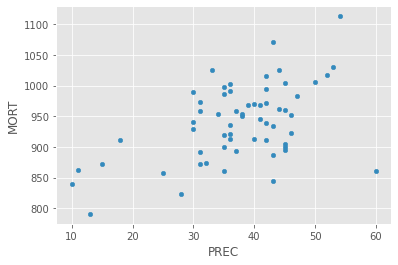

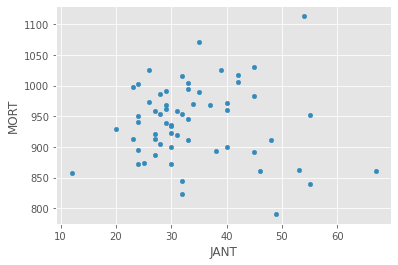

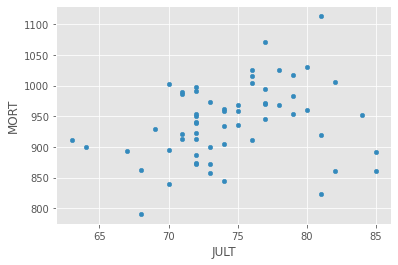

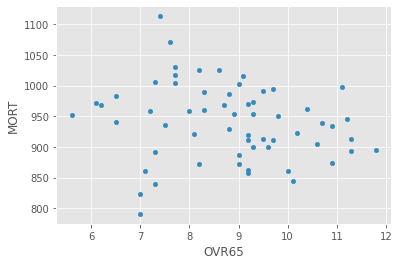

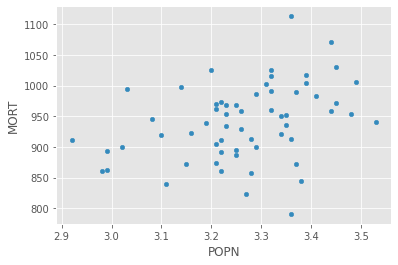

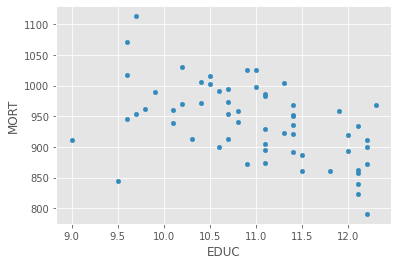

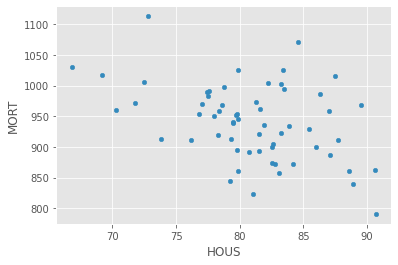

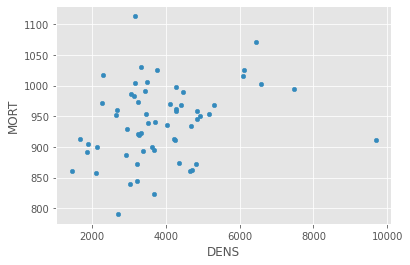

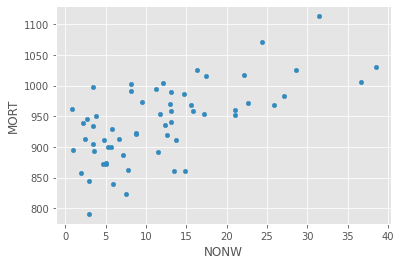

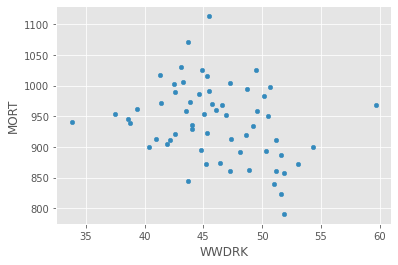

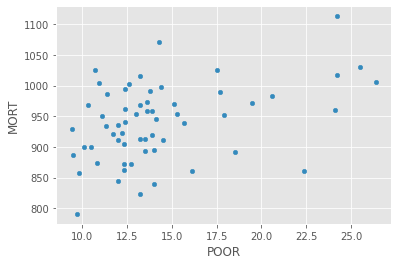

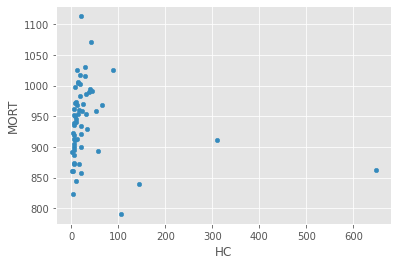

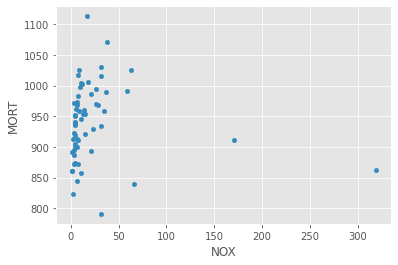

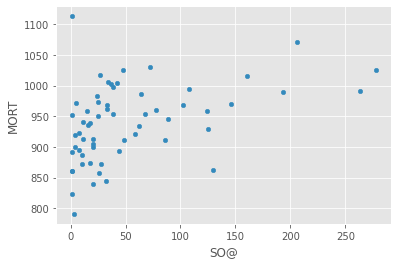

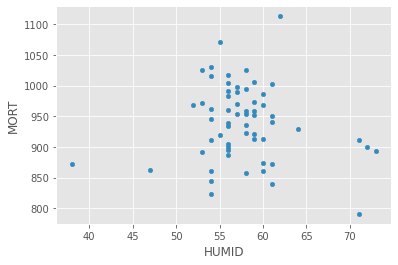

In [5]:
for colname in df_pollution.columns[:-1]:
    df_pollution[[colname, 'MORT']].plot(x=colname, y='MORT', kind='scatter')

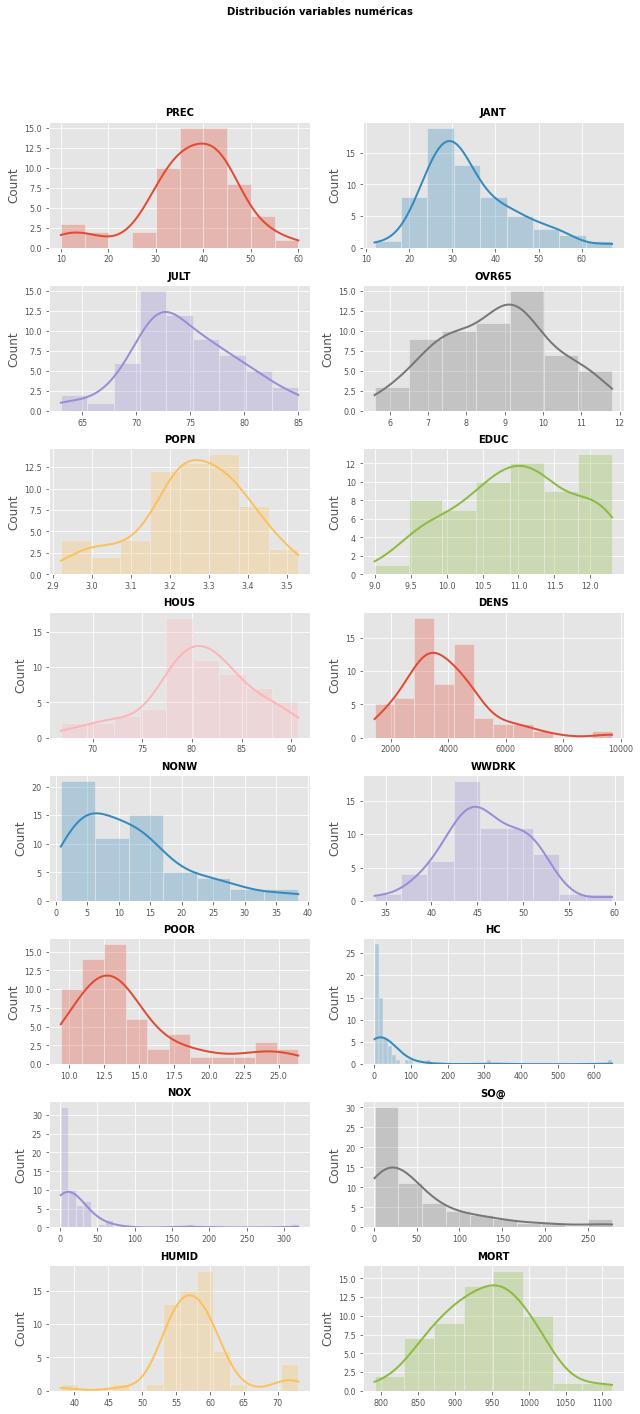

In [6]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(9, 5*4))
axes = axes.flat
for i, colum in enumerate(df_pollution.columns):
    sns.histplot(
        data    = df_pollution,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i%10]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [7]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = df_pollution.corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
203,NOX,HC,0.983840,0.983840
188,HC,NOX,0.983840,0.983840
138,NONW,POOR,0.704915,0.704915
168,POOR,NONW,0.704915,0.704915
89,EDUC,WWDRK,0.703196,0.703196
149,WWDRK,EDUC,0.703196,0.703196
166,POOR,HOUS,-0.680680,0.680680
106,HOUS,POOR,-0.680680,0.680680
143,NONW,MORT,0.643747,0.643747
248,MORT,NONW,0.643747,0.643747


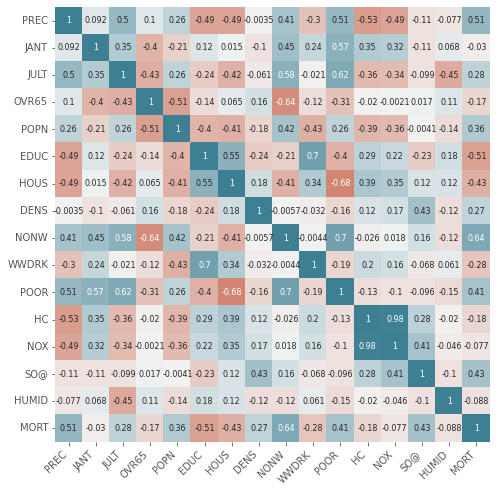

In [8]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

# Para profundizar

- Funciones y transparencias AED de clase
- Regresión lineal con Python. Joaquin Amat Rodrigo. Octubre, 2020. https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html
- Step by Step Regression & Backwards Elimination. https://www.kaggle.com/ashishsaxena2209/step-by-step-regression-backward-elimination

# Recuerda 

Si usas Colab, recuerda guardar tus cambios en tu repositorio utilizando la opción "Save a copy in GitHub..." del menú File.

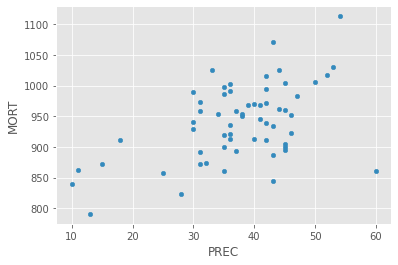

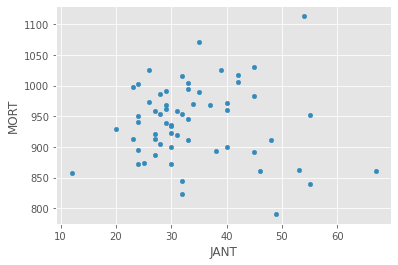

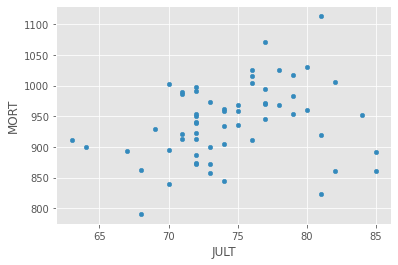

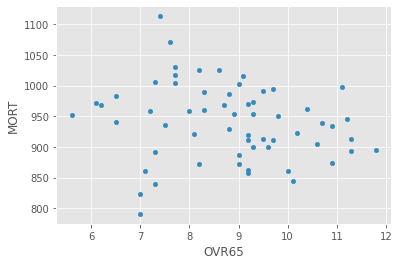

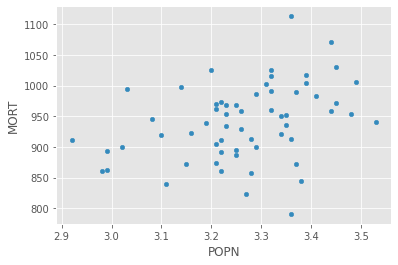

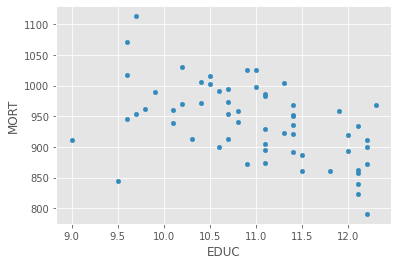

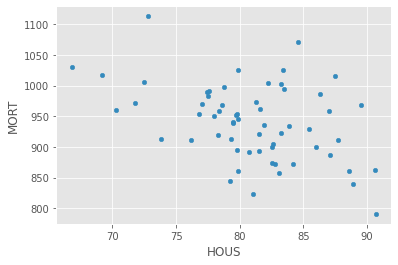

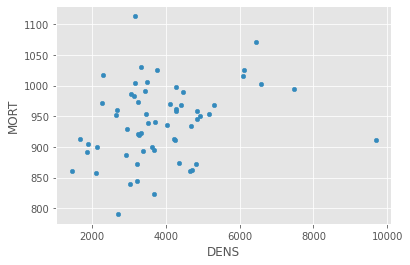

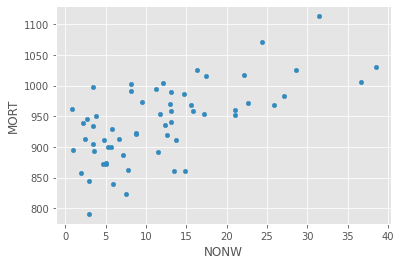

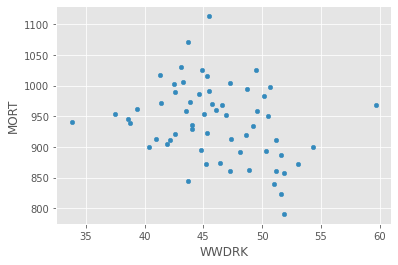

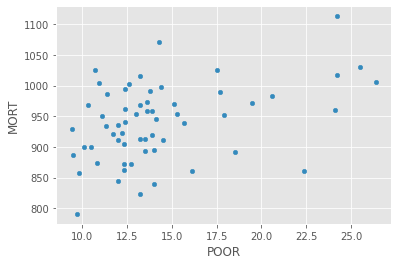

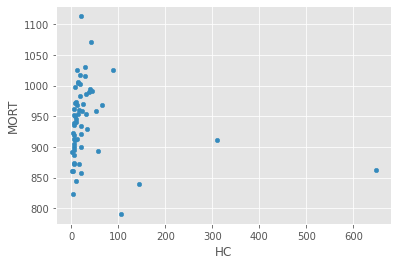

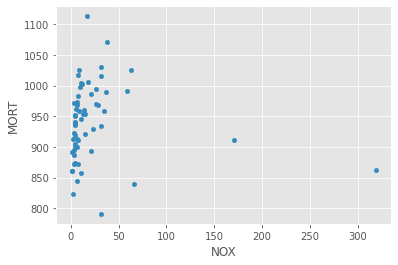

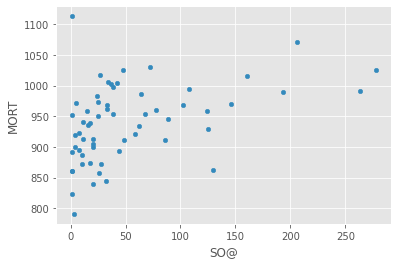

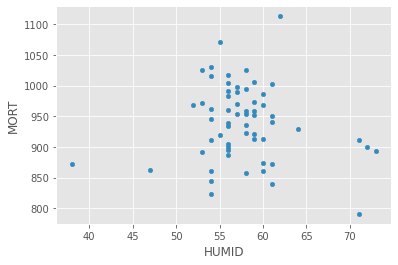

In [9]:
for colname in df_pollution.columns[:-1]:
    df_pollution[[colname, 'MORT']].plot(x=colname, y='MORT', kind='scatter')

Para analizar la información usamos describe() como hemos visto en clase:

In [10]:
#EJERCICIO 1
df_pollution.describe()
  

,PREC,JANT,JULT,OVR65,POPN,EDUC,HOUS,DENS,NONW,WWDRK,POOR,HC,NOX,SO@,HUMID,MORT
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000
mean,37.366667,33.983333,74.583333,8.798333,3.263167,10.973333,80.913333,3876.050000,11.870000,46.081667,14.373333,37.850000,22.65000,53.766667,57.666667,940.358433
std,9.984678,10.168899,4.763177,1.464552,0.135252,0.845299,5.141373,1454.102361,8.921148,4.613043,4.160096,91.977673,46.33329,63.390468,5.369931,62.206278
min,10.000000,12.000000,63.000000,5.600000,2.920000,9.000000,66.800000,1441.000000,0.800000,33.800000,9.400000,1.000000,1.00000,1.000000,38.000000,790.733000
25%,32.750000,27.000000,72.000000,7.675000,3.210000,10.400000,78.375000,3104.250000,4.950000,43.250000,12.000000,7.000000,4.00000,11.000000,55.000000,898.372000
50%,38.000000,31.500000,74.000000,9.000000,3.265000,11.050000,81.150000,3567.000000,10.400000,45.500000,13.200000,14.500000,9.00000,30.000000,57.000000,943.683000
75%,43.250000,40.000000,77.250000,9.700000,3.360000,11.500000,83.600000,4519.750000,15.650000,49.525000,15.150000,30.250000,23.75000,69.000000,60.000000,983.205750
max,60.000000,67.000000,85.000000,11.800000,3.530000,12.300000,90.700000,9699.000000,38.500000,59.700000,26.400000,648.000000,319.00000,278.000000,73.000000,1113.156000


In [11]:
#df_pollution.sum(axis=1) 

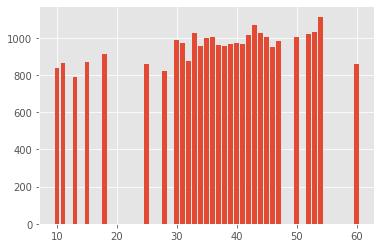

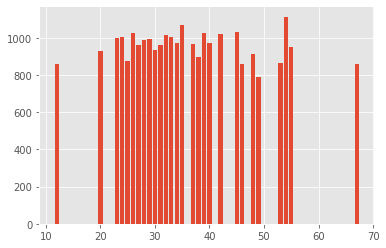

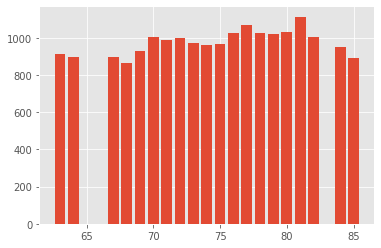

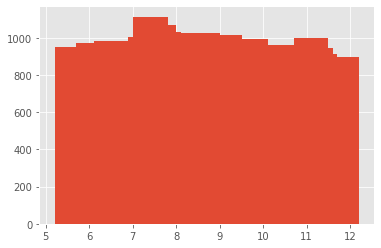

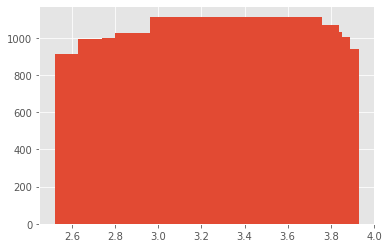

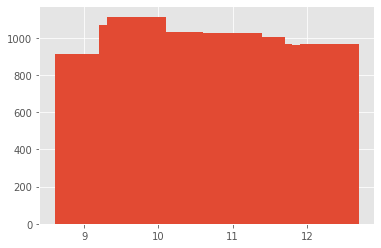

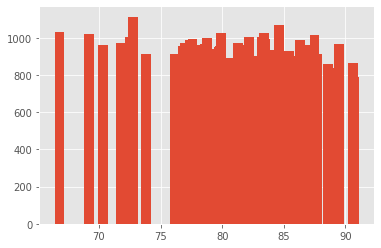

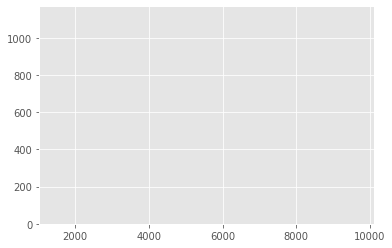

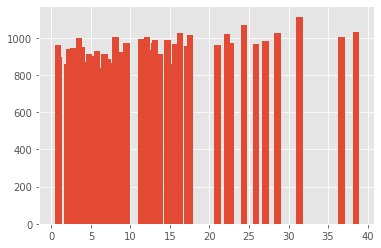

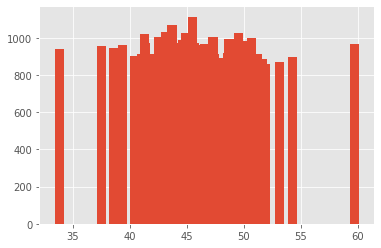

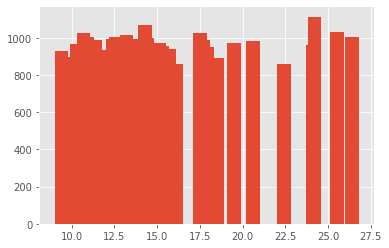

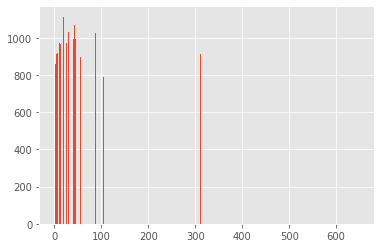

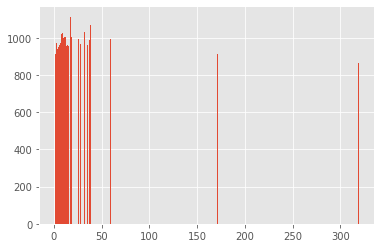

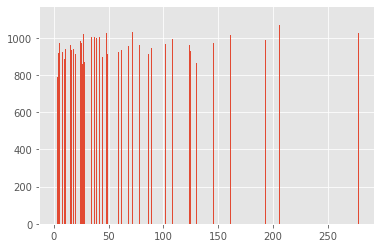

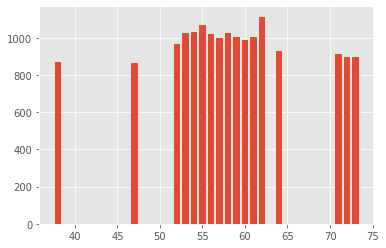

In [12]:
#Barplots
for colname in df_pollution.columns[:-1]:
    plt.bar(x=df_pollution[colname],height=df_pollution['MORT'])
    plt.show()

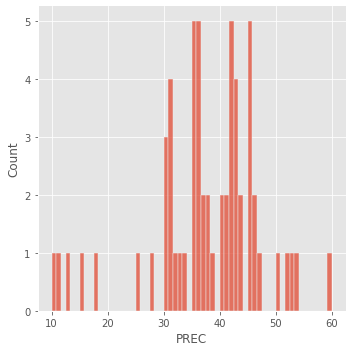

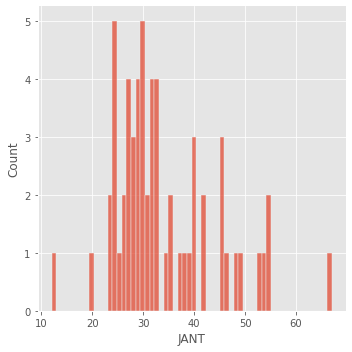

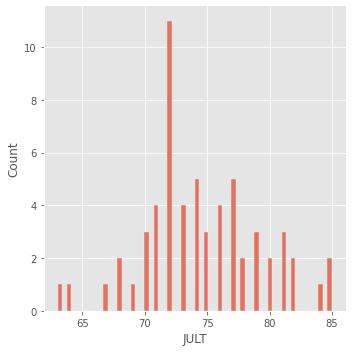

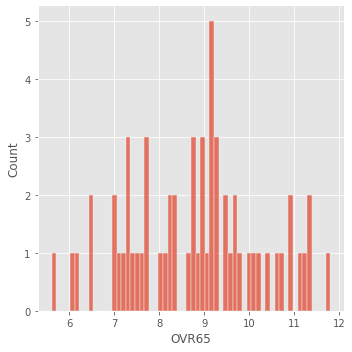

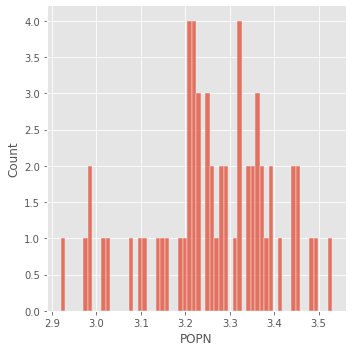

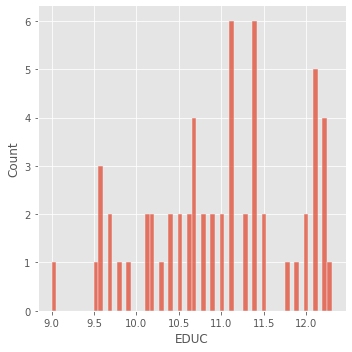

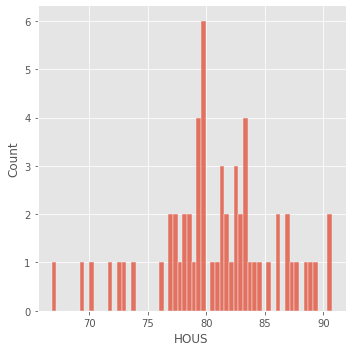

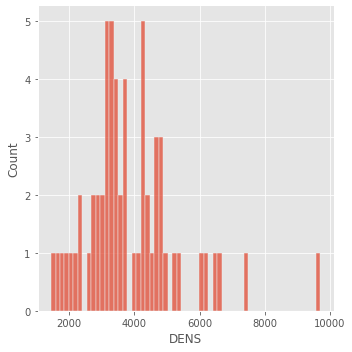

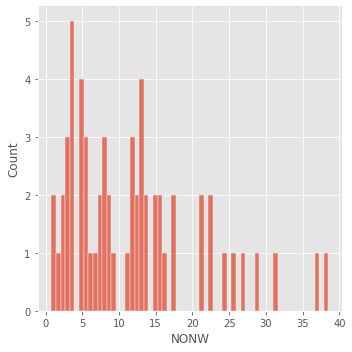

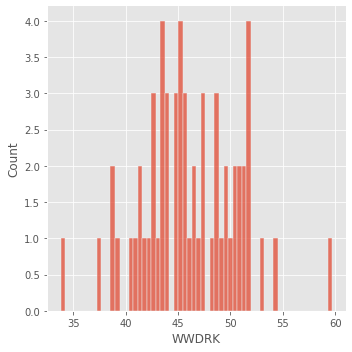

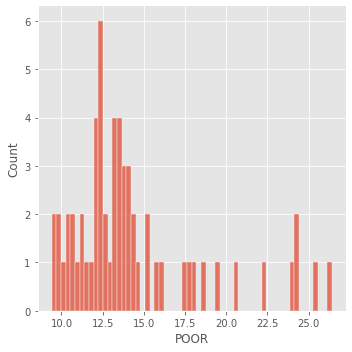

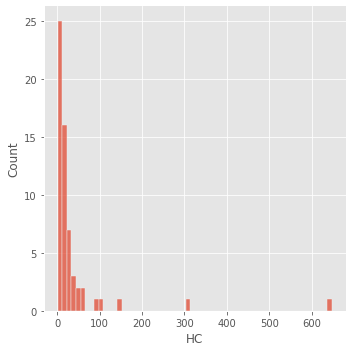

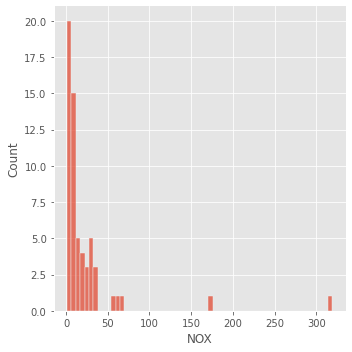

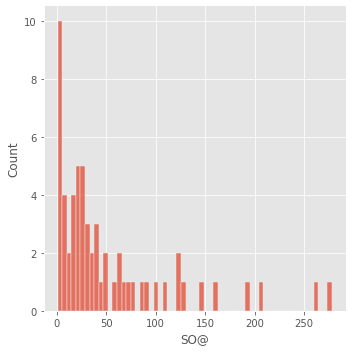

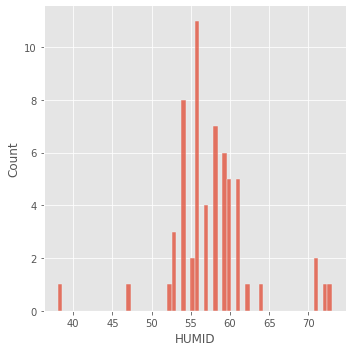

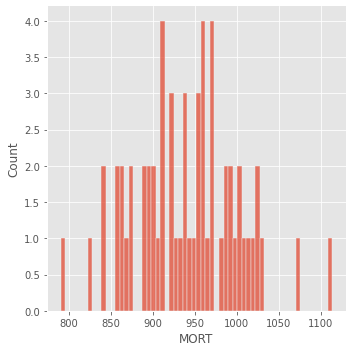

In [13]:
# Histograma con seaborn
for colname in df_pollution.columns:
  sns.displot(df_pollution[colname], kde=False, bins=60)

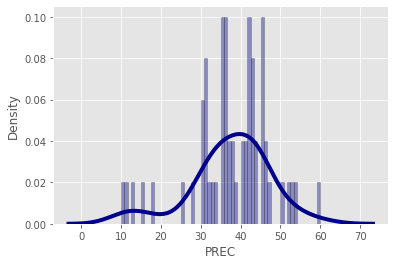

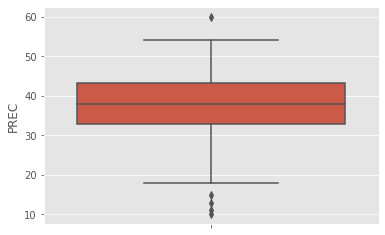

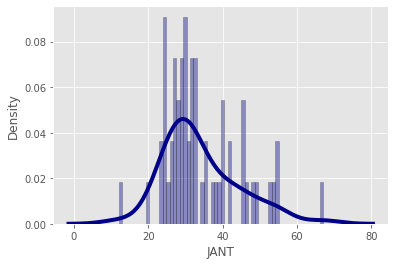

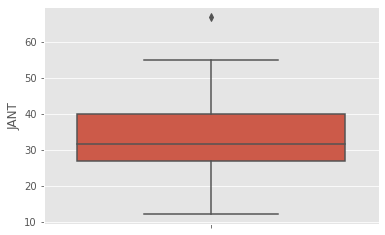

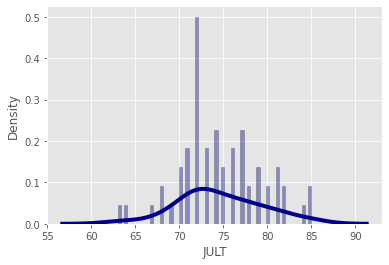

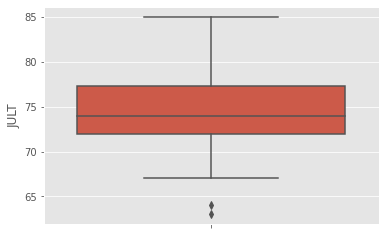

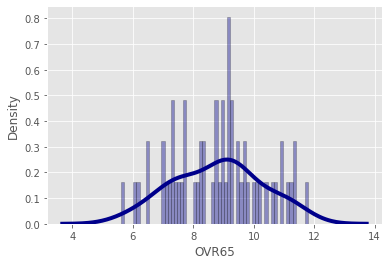

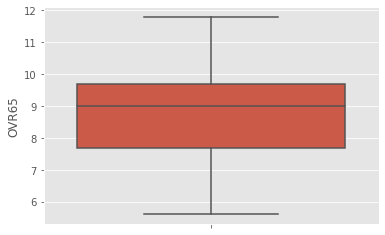

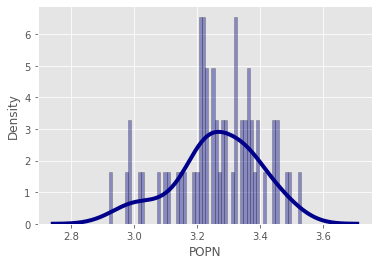

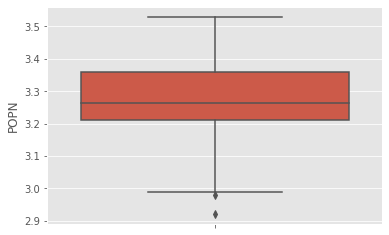

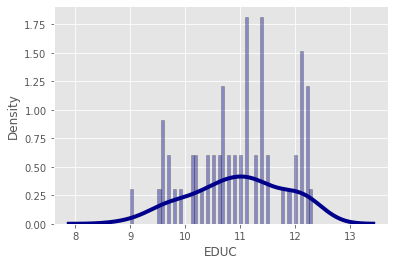

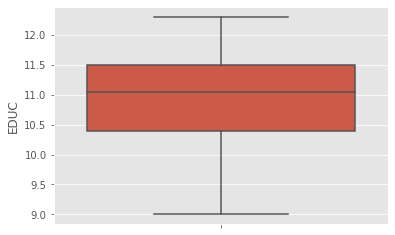

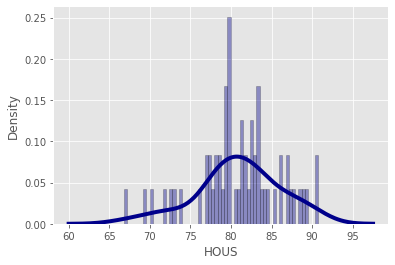

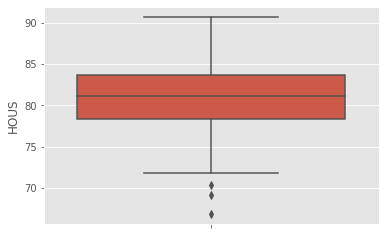

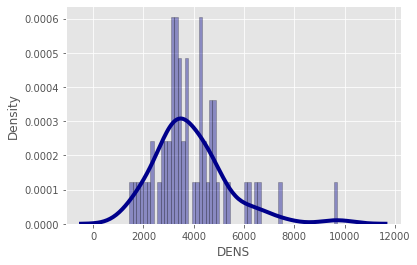

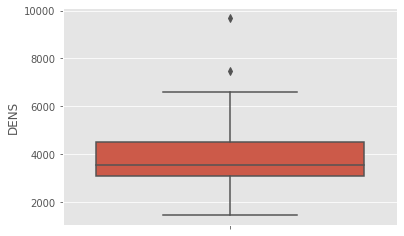

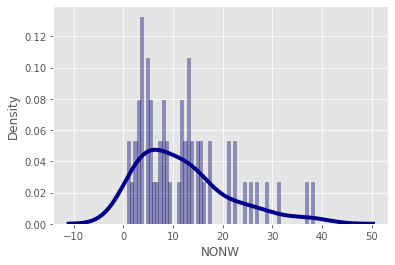

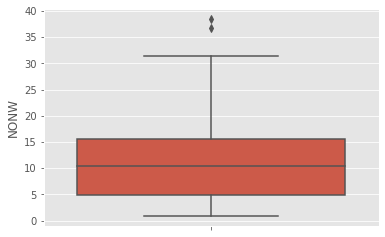

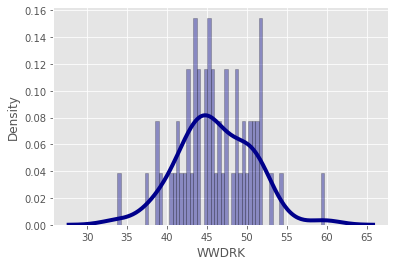

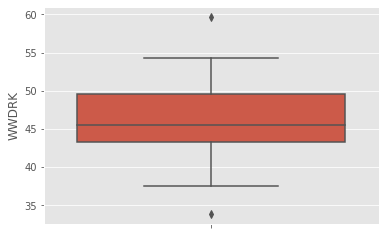

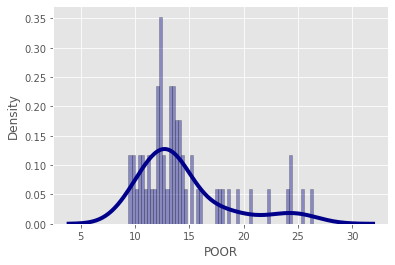

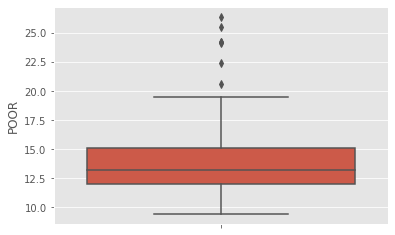

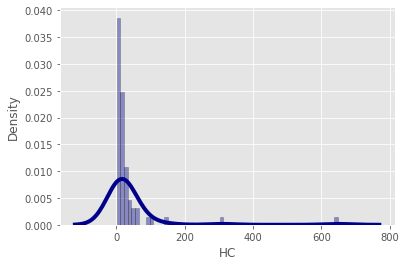

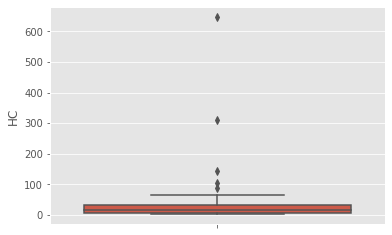

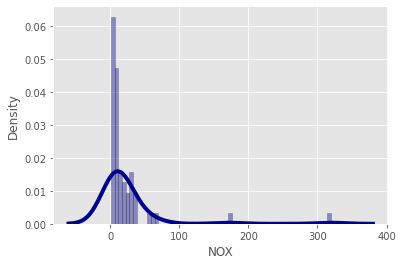

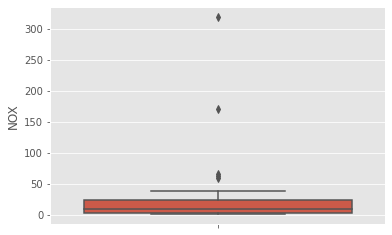

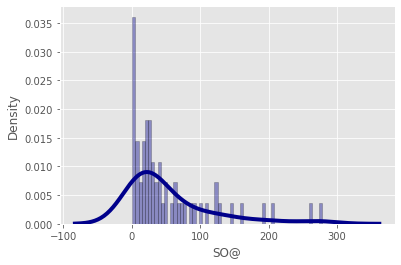

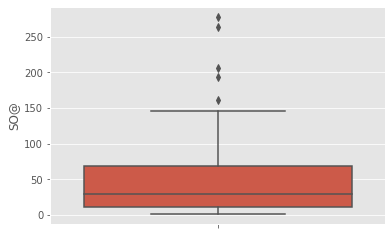

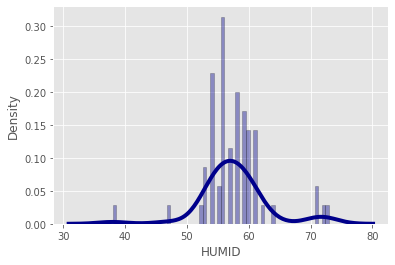

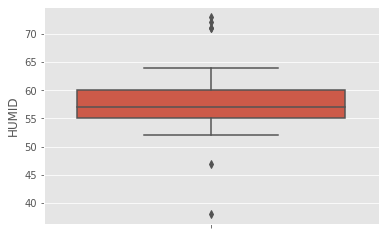

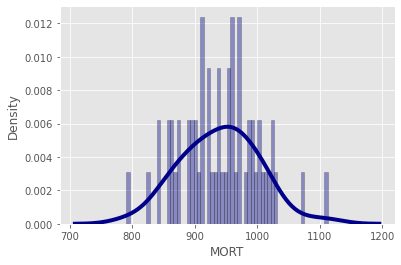

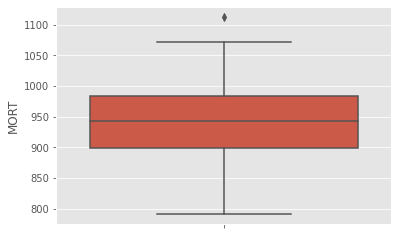

In [14]:
#EJERCICIO 2
# Histograma y density plot:
for colname in df_pollution.columns:
  sns.distplot(df_pollution[colname],hist=True,bins=60,color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
  plt.show() #para sacar los graficos

  #PARA SACAR LOS ESPURIOS  => BOXPLOT
  sns.boxplot(y=df_pollution[colname],data=df_pollution)
#solución quito esos dos y hago la media.
  plt.show()
 

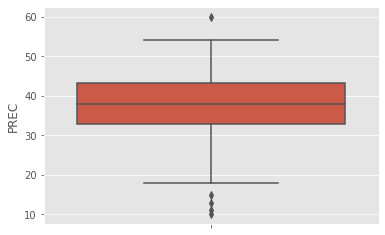

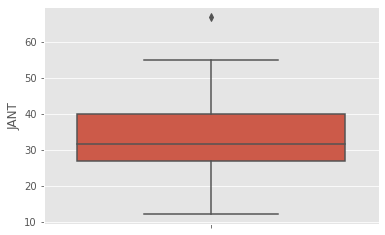

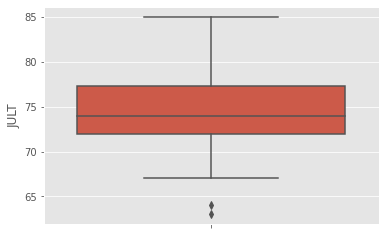

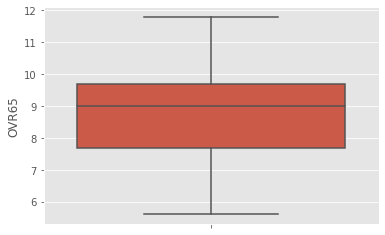

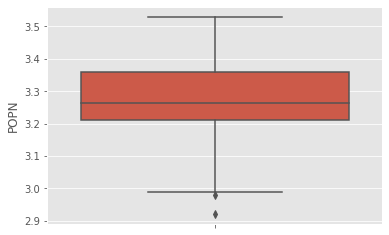

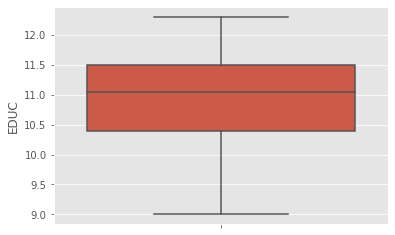

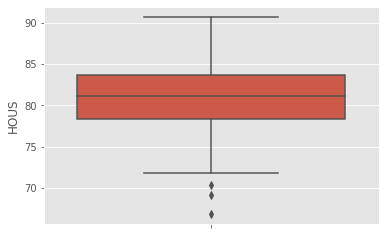

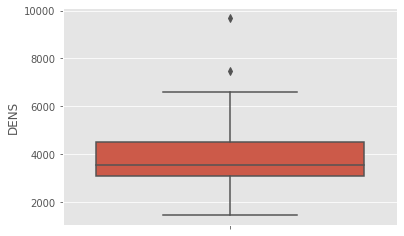

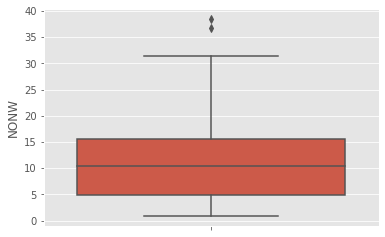

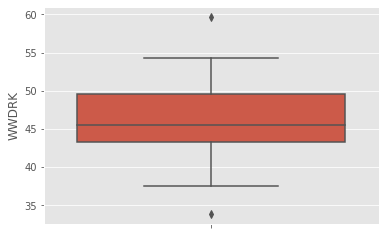

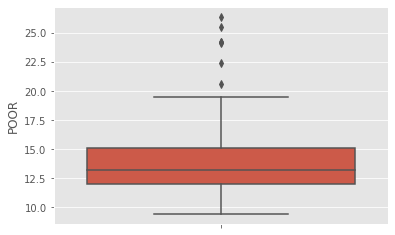

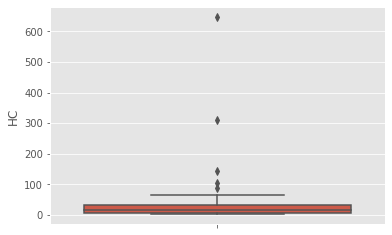

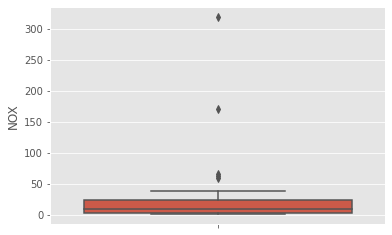

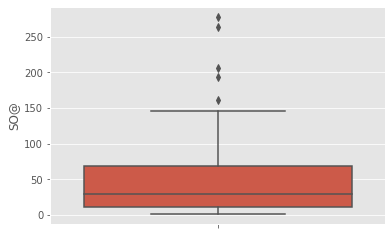

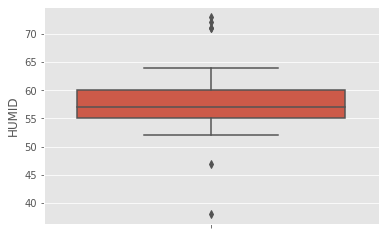

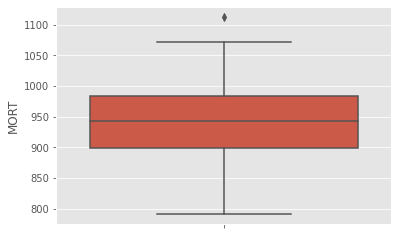

In [15]:
#PARA SACAR LOS ESPURIOS  => BOXPLOT
for colname in df_pollution.columns:
  sns.boxplot(y=df_pollution[colname],data=df_pollution)
#solución quito esos dos y hago la media.
  plt.show()

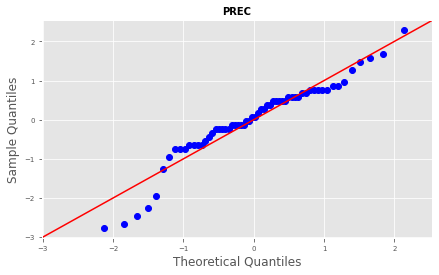

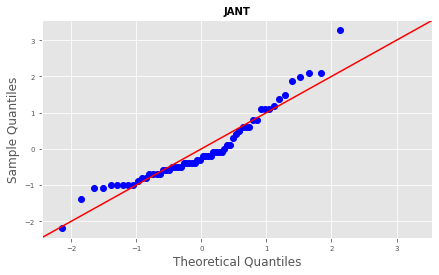

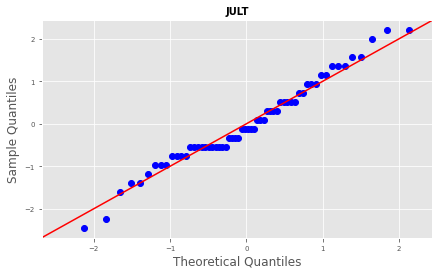

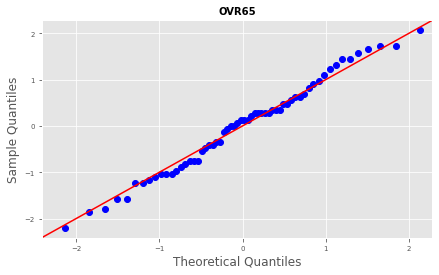

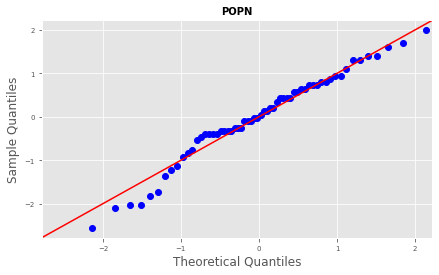

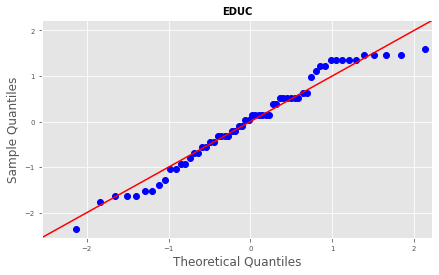

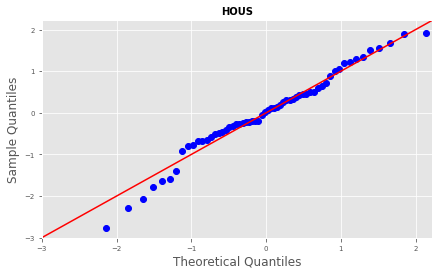

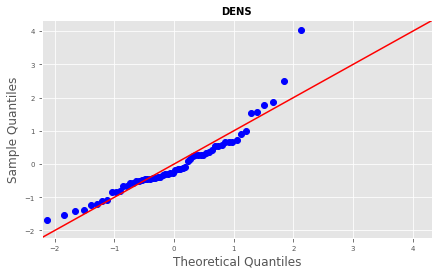

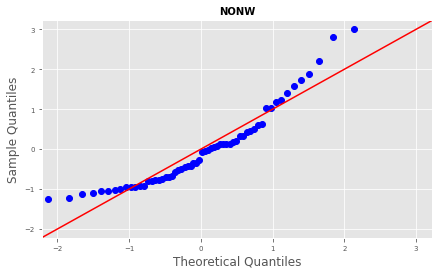

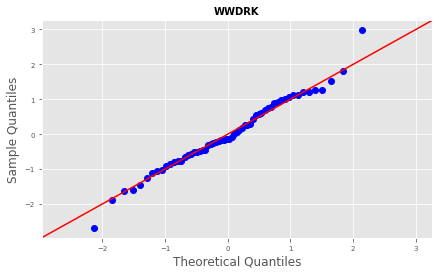

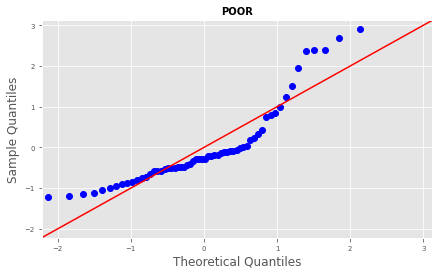

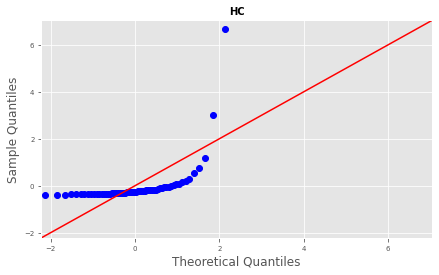

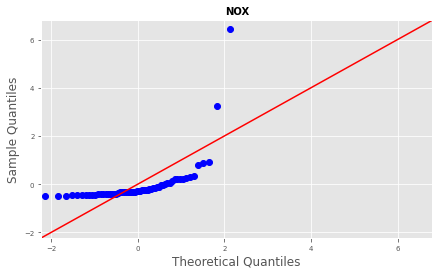

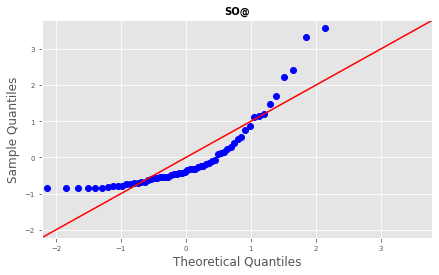

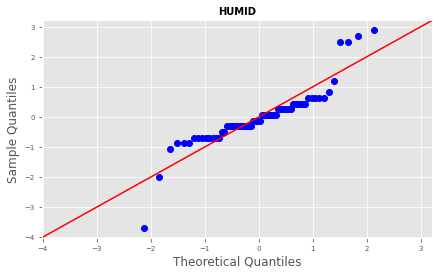

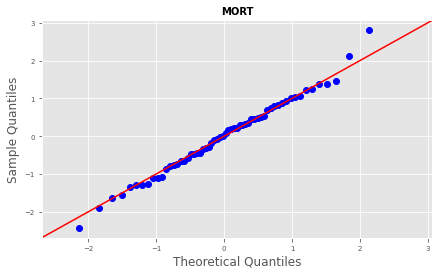

In [16]:
#Cuantil-Cuantil (QQPlots)
for colname in df_pollution.columns:
  fig, ax = plt.subplots(figsize=(7,4))
  sm.qqplot(
    df_pollution[colname],
    fit   = True,
    #line  = 'q',
    line  ='45',
    #alpha = 0.4,
    #lw    = 2,
    ax    = ax
)
  ax.set_title(colname, fontsize = 10,
             fontweight = "bold")
  ax.tick_params(labelsize = 7)


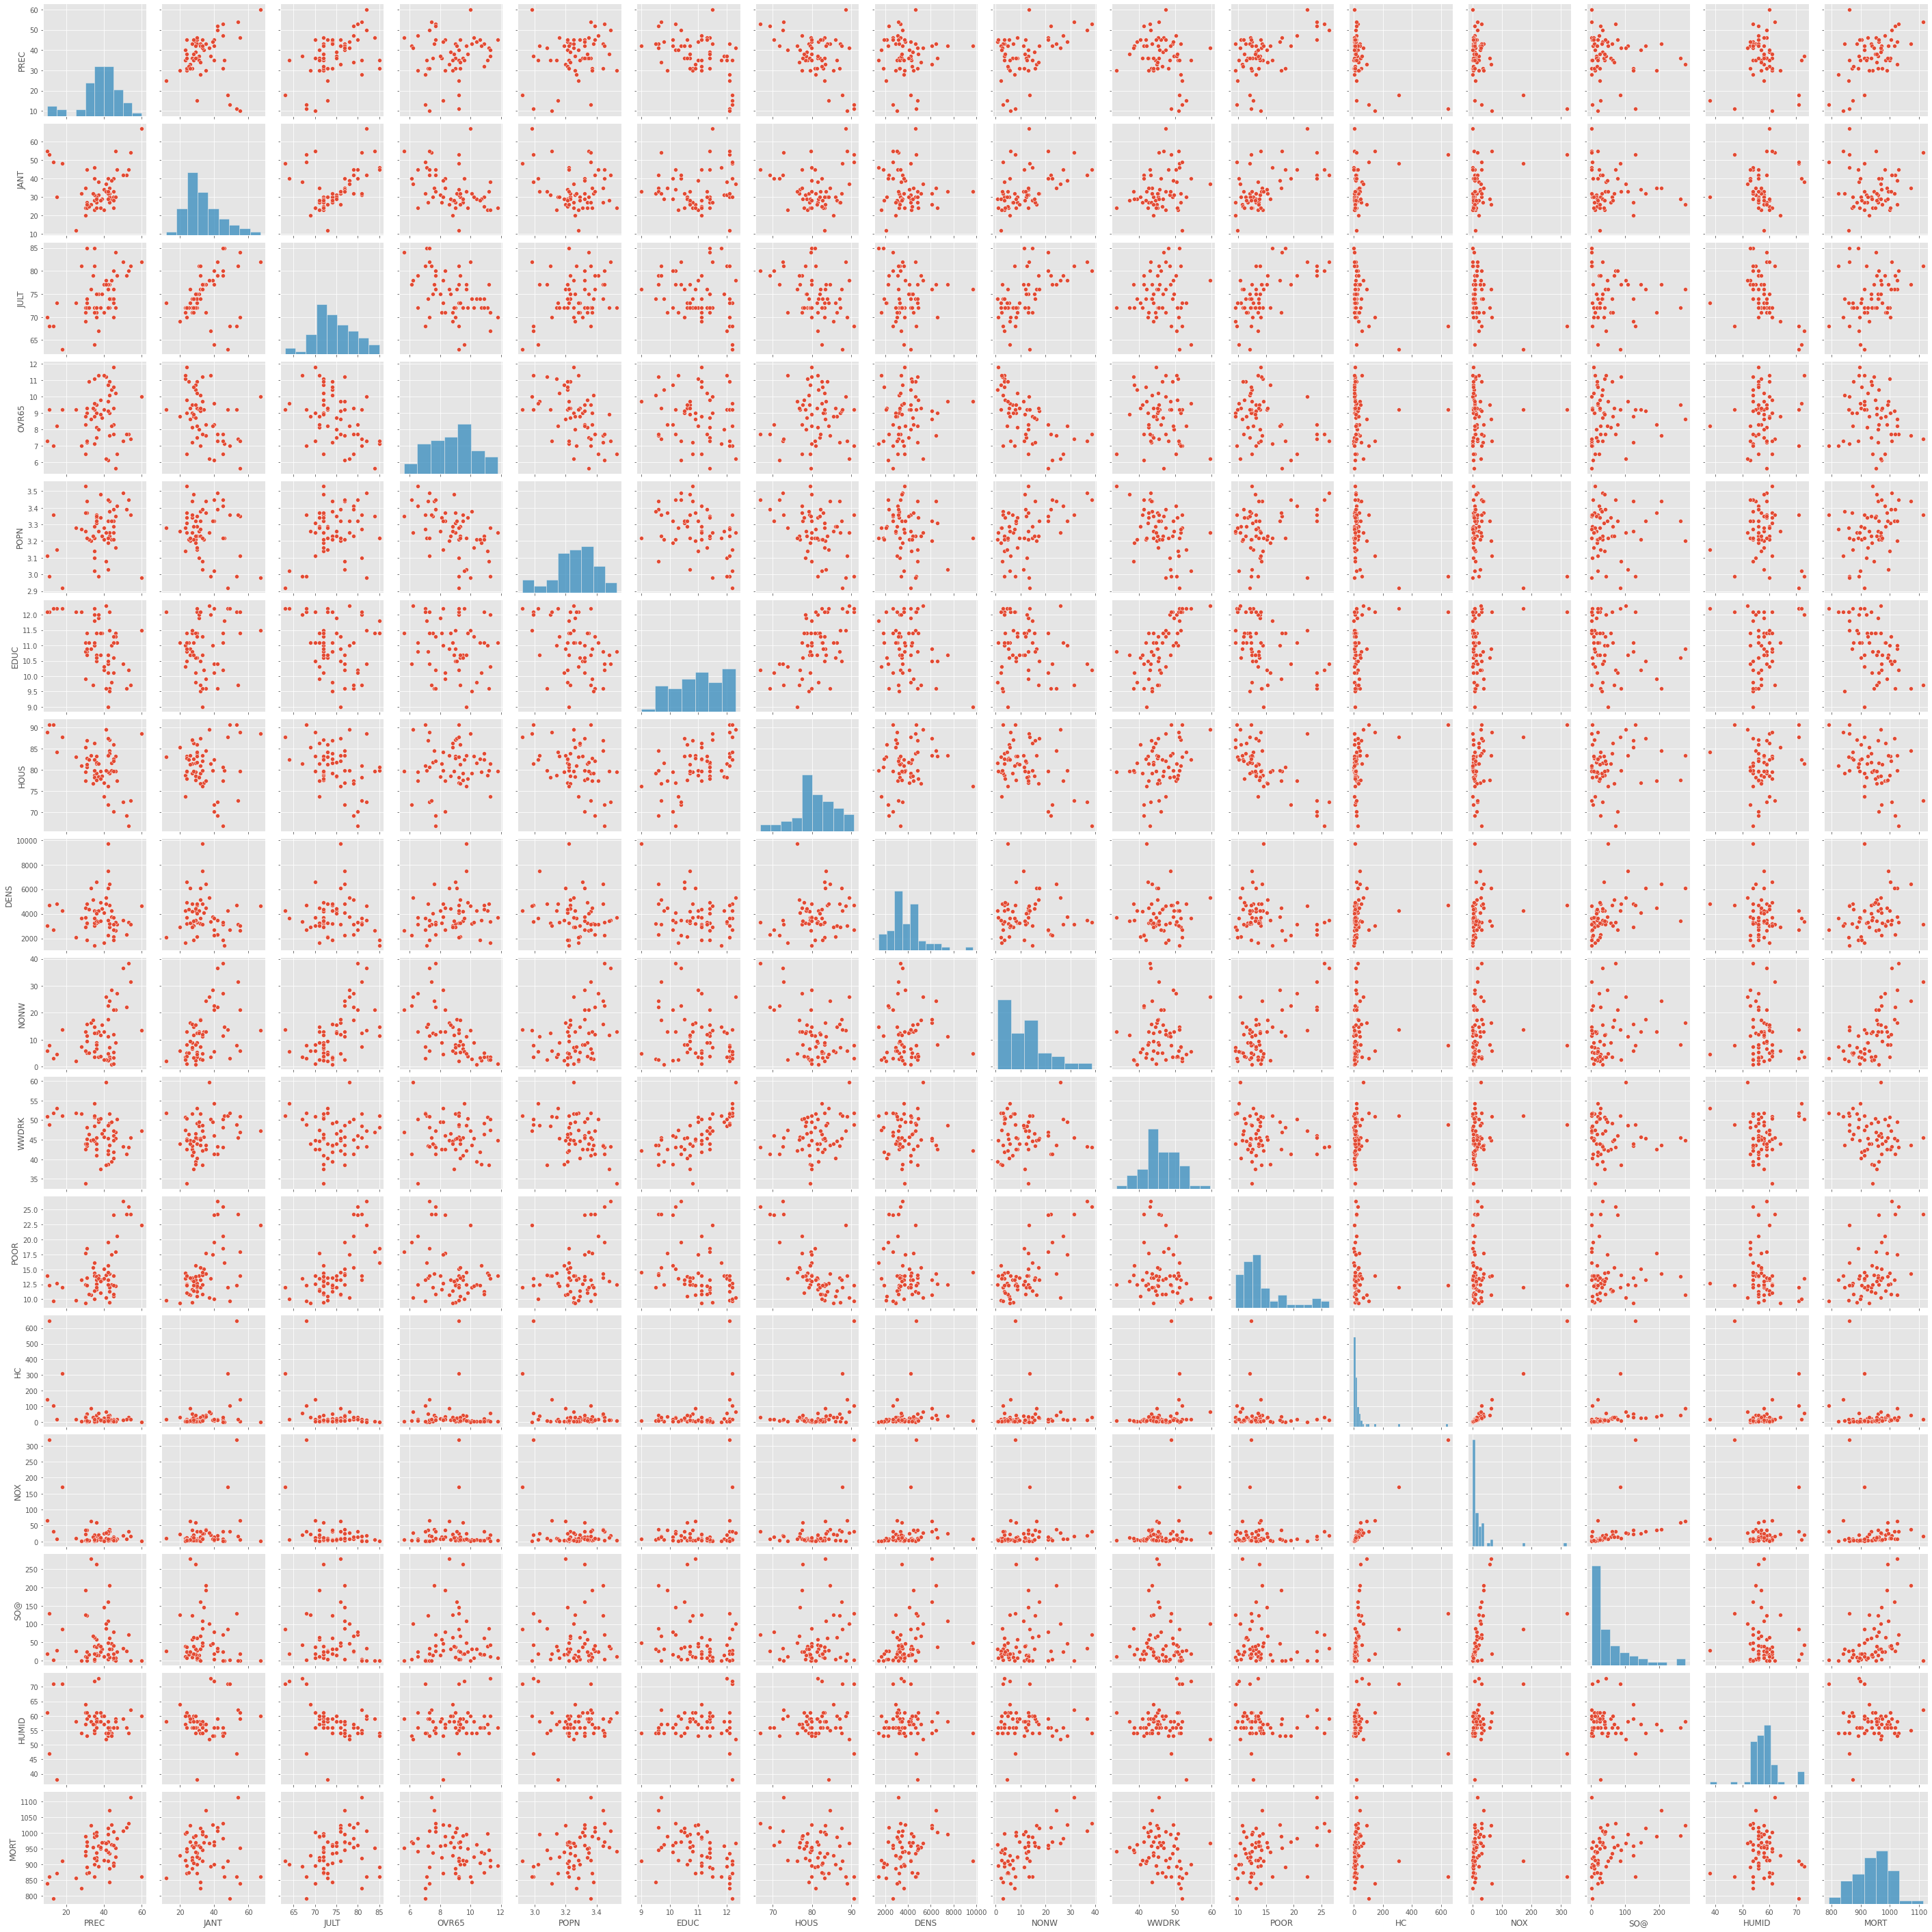

In [17]:
#EJERCICIO 5 PAIR PLOTS y MATRICES CORRELACION
sns.pairplot(df_pollution)


In [18]:
df_pollution.corr()

,PREC,JANT,JULT,OVR65,POPN,EDUC,HOUS,DENS,NONW,WWDRK,POOR,HC,NOX,SO@,HUMID,MORT
PREC,1.000000,0.092208,0.503273,0.101113,0.263444,-0.490425,-0.490759,-0.003515,0.413204,-0.297291,0.506585,-0.531760,-0.487321,-0.106924,-0.077343,0.509499
JANT,0.092208,1.000000,0.346282,-0.398099,-0.209212,0.116284,0.014852,-0.100051,0.453774,0.237992,0.565314,0.350809,0.321014,-0.107810,0.067872,-0.030020
JULT,0.503273,0.346282,1.000000,-0.434040,0.262280,-0.238544,-0.415032,-0.060994,0.575309,-0.021412,0.619308,-0.356494,-0.337668,-0.099348,-0.452809,0.277014
OVR65,0.101113,-0.398099,-0.434040,1.000000,-0.509087,-0.138862,0.065010,0.161991,-0.637821,-0.117715,-0.309771,-0.020486,-0.002082,0.017248,0.112426,-0.174602
POPN,0.263444,-0.209212,0.262280,-0.509087,1.000000,-0.395075,-0.410590,-0.184332,0.419410,-0.425723,0.259904,-0.388205,-0.358429,-0.004084,-0.135740,0.357315
EDUC,-0.490425,0.116284,-0.238544,-0.138862,-0.395075,1.000000,0.552237,-0.243883,-0.208774,0.703196,-0.403338,0.286835,0.224402,-0.234346,0.176491,-0.510984
HOUS,-0.490759,0.014852,-0.415032,0.065010,-0.410590,0.552237,1.000000,0.181881,-0.410334,0.338745,-0.680680,0.386767,0.348250,0.117952,0.121901,-0.426819
DENS,-0.003515,-0.100051,-0.060994,0.161991,-0.184332,-0.243883,0.181881,1.000000,-0.005678,-0.031765,-0.162945,0.120282,0.165312,0.432086,-0.124976,0.265498
NONW,0.413204,0.453774,0.575309,-0.637821,0.419410,-0.208774,-0.410334,-0.005678,1.000000,-0.004387,0.704915,-0.025865,0.018385,0.159293,-0.117957,0.643747
WWDRK,-0.297291,0.237992,-0.021412,-0.117715,-0.425723,0.703196,0.338745,-0.031765,-0.004387,1.000000,-0.185161,0.203672,0.160034,-0.068461,0.060713,-0.284802


In [19]:
#EJERCICIO 6
df_pollution.corr()['MORT']

PREC     0.509499
JANT    -0.030020
JULT     0.277014
OVR65   -0.174602
POPN     0.357315
EDUC    -0.510984
HOUS    -0.426819
DENS     0.265498
NONW     0.643747
WWDRK   -0.284802
POOR     0.410487
HC      -0.177237
NOX     -0.077379
SO@      0.425893
HUMID   -0.088494
MORT     1.000000
Name: MORT, dtype: float64

In [20]:
#EJERCICIO 7
def mort_cat(mort):
  if(mort<900):
    return 'BAJO'
  elif(mort>=900 and mort<1000):
    return 'MEDIO'
  else:
    return 'ALTO'
    

In [21]:
df_pollution['MORT_CAT']=df_pollution['MORT'].apply(mort_cat)

In [22]:
df_pollution.head()

,PREC,JANT,JULT,OVR65,POPN,EDUC,HOUS,DENS,NONW,WWDRK,POOR,HC,NOX,SO@,HUMID,MORT,MORT_CAT
0,36.0,27.0,71.0,8.1,3.34,11.4,81.5,3243.0,8.8,42.6,11.7,21.0,15.0,59.0,59.0,921.870,MEDIO
1,35.0,23.0,72.0,11.1,3.14,11.0,78.8,4281.0,3.5,50.7,14.4,8.0,10.0,39.0,57.0,997.875,MEDIO
2,44.0,29.0,74.0,10.4,3.21,9.8,81.6,4260.0,0.8,39.4,12.4,6.0,6.0,33.0,54.0,962.354,MEDIO
3,47.0,45.0,79.0,6.5,3.41,11.1,77.5,3125.0,27.1,50.2,20.6,18.0,8.0,24.0,56.0,982.291,MEDIO
4,43.0,35.0,77.0,7.6,3.44,9.6,84.6,6441.0,24.4,43.7,14.3,43.0,38.0,206.0,55.0,1071.289,ALTO


In [23]:
#EJERCICIO 8 
#CON ESTO NORMALIZAMOS

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
datos = StandardScaler().fit_transform(df_pollution.values[:,:-1])
#X = df_pollution.da
#.DataFrame(df_pollution.data, columns=df_pollution.columns)
df_norm= pd.DataFrame(datos, columns=df_pollution.columns[:-1])

#Esto lo hace el Standard Scaler
# def mean_norm(df_input):
#     return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
# df_mean_norm = mean_norm(df)
# print(df_mean_norm)


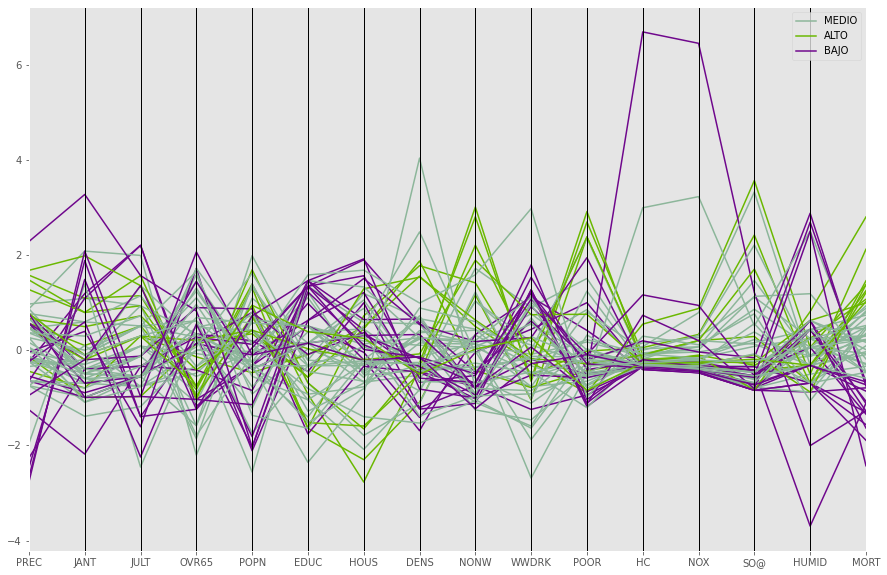

In [24]:
#AHORA VAMOS A HACER LAS COORDENADAS PARALELAS
from sklearn import datasets

#X = pd.DataFrame(df_norm.values, columns=df_pollution.columns[:-1])
#X['class'] = df_norm.ta[df_norm.target]
#df_norm.head()
df_norm['MORT_CAT']=df_pollution['MORT_CAT'].values
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
pd.plotting.parallel_coordinates(df_norm, class_column='MORT_CAT',ax=ax)


EN HC Y NOX, COMO HAY 2 ESPURIOS AL ESTANDARIZAR HACE QUE EL RANGO SE DISPARE.
NONW HAY DIRENCIA

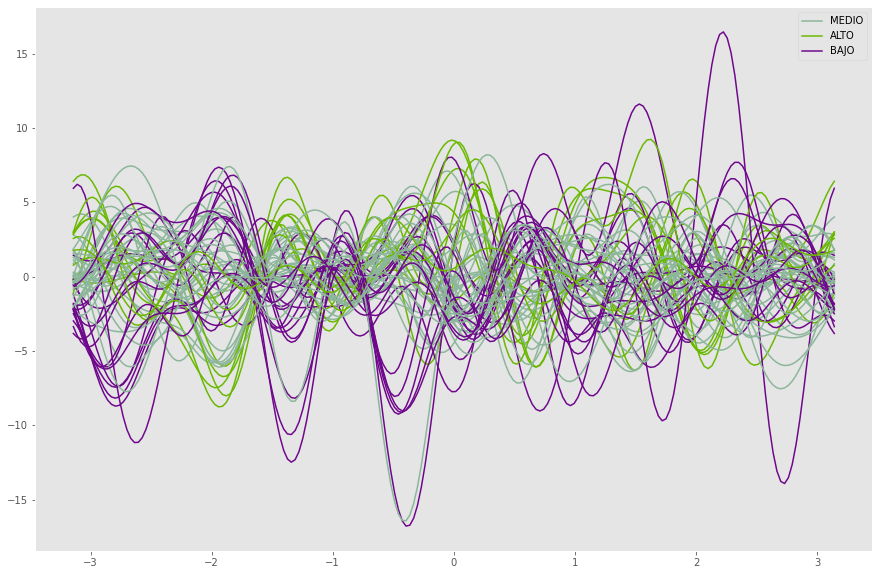

In [28]:
#CURVAS ANDREWS 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
pd.plotting.andrews_curves(df_norm, class_column='MORT_CAT',ax=ax)

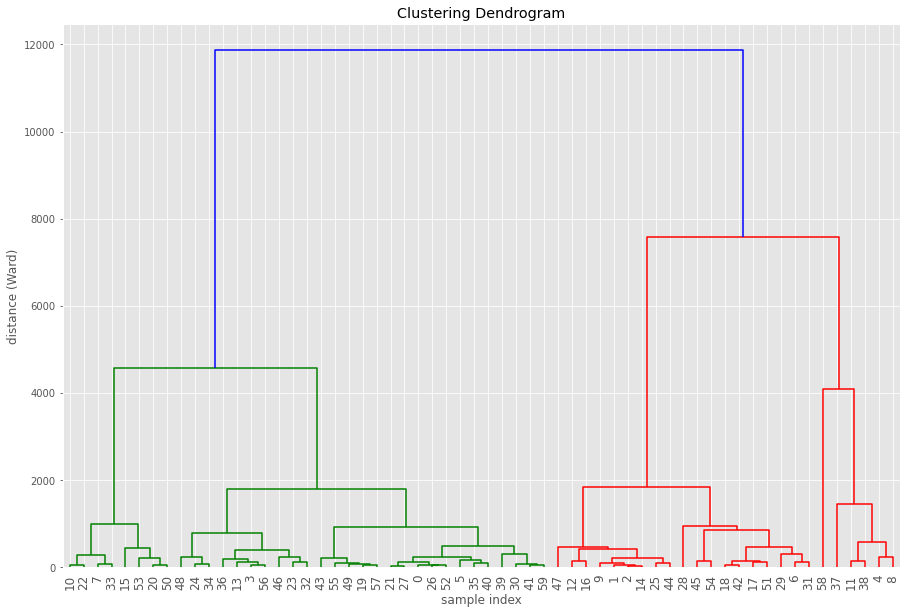

In [55]:
#DENDOGRAMAS
from scipy import cluster

Z = cluster.hierarchy.ward(df_pollution.values[:,:-1])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
den = cluster.hierarchy.dendrogram(Z, labels=df_norm.index, leaf_font_size=12,leaf_rotation=90,ax=ax)
plt.title('Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance (Ward)')
plt.show()

VEMOS COMO HAY 5 CLUSTERES CLAROS A LA ALTURA DE LOS 4000, SIENDO UNO DE ELLOS UN ESPURIO (EL 58) YA QUE EL PUNTO MÁS CERCANO ESTÁ A ESA ALTURA.

In [81]:
#EJERCICIO 9 PCA


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
#USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
#datos = StandardScaler().fit_transform(USArrests.data)

modelo_pca = PCA().fit(datos)
componentes_principales = pd.DataFrame(modelo_pca.components_, 
                                       columns=df_pollution.columns[:-1],
                                       index=['PC'+str(i+1) for i in range(datos.shape[1])])
display(componentes_principales)


,PREC,JANT,JULT,OVR65,POPN,EDUC,HOUS,DENS,NONW,WWDRK,POOR,HC,NOX,SO@,HUMID,MORT
PC1,-0.336695,-0.057553,-0.320576,0.155296,-0.285398,0.293791,0.345269,0.033467,-0.313794,0.196136,-0.344207,0.250798,0.226728,0.015787,0.109189,-0.294026
PC2,-0.113583,0.463602,0.167142,-0.344587,-0.077239,0.157534,0.065490,0.018034,0.363090,0.229178,0.247404,0.393455,0.395319,0.142727,-0.081814,0.079898
PC3,-0.001523,-0.179848,-0.168470,0.194812,-0.005597,-0.348163,0.011322,0.437103,0.009912,-0.269244,-0.080187,0.210785,0.280157,0.515166,-0.102580,0.333203
PC4,0.325508,0.330008,0.034811,0.524002,-0.548713,-0.142394,-0.161661,0.061519,-0.109637,0.009618,0.292025,0.072368,0.063750,-0.169239,0.140143,-0.055631
PC5,0.129198,-0.082768,0.392329,0.037212,-0.238237,0.144797,0.196922,0.419022,-0.012986,0.397236,-0.135515,-0.224042,-0.209517,0.101190,-0.497992,0.020337
PC6,-0.178372,-0.035248,0.169747,0.062652,0.060219,-0.173399,-0.132930,-0.193545,-0.230334,-0.300026,0.091335,0.215113,0.189961,-0.172927,-0.680707,-0.344009
PC7,0.001818,0.374027,0.098632,-0.252196,0.074733,-0.223083,0.425926,0.463218,-0.087002,-0.403410,-0.054628,-0.055164,-0.116704,-0.225641,0.167622,-0.257812
PC8,-0.507584,-0.079430,-0.092914,-0.111259,-0.019995,-0.108308,-0.553857,0.484874,-0.036584,0.235466,0.193519,-0.036276,-0.077655,-0.170582,0.112043,-0.133479
PC9,-0.267262,0.175167,0.268224,-0.045270,-0.147847,-0.190344,-0.023774,-0.259985,-0.196036,-0.006511,0.096085,-0.239851,-0.160630,0.675295,0.171548,-0.284885
PC10,0.364516,0.149127,-0.209435,0.154776,0.547269,-0.214853,-0.009991,0.090483,-0.059273,0.458158,0.018679,0.071916,0.074453,0.150071,-0.024116,-0.418962


Porcentajes de varianza explicados (acumulados): [0.30491223 0.47782313 0.62110286 0.70558163 0.78205084 0.849972
 0.89131426 0.92127835 0.94674716 0.9620484  0.97417951 0.98395463
 0.99125526 0.99683554 0.99970816 1.        ]


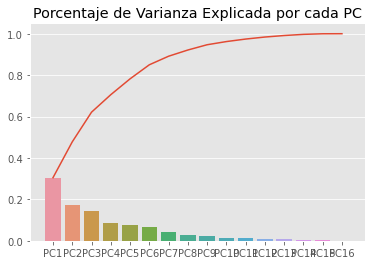

In [82]:
fig = sns.barplot(x=['PC'+str(i+1) for i in range(datos.shape[1])],
            y=modelo_pca.explained_variance_ratio_).\
set_title("Porcentaje de Varianza Explicada por cada PC")
fig = sns.lineplot(x=['PC'+str(i+1) for i in range(datos.shape[1])],
            y=modelo_pca.explained_variance_ratio_.cumsum())
print('Porcentajes de varianza explicados (acumulados):',
      modelo_pca.explained_variance_ratio_.cumsum())

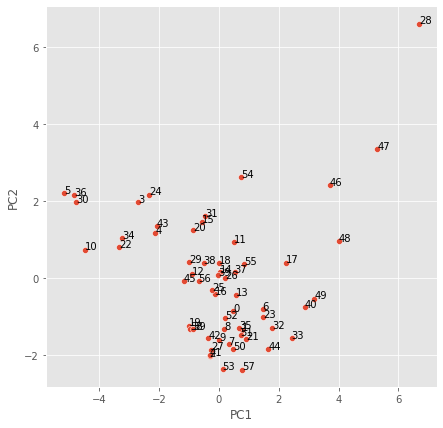

In [85]:
proyeccion_pca = pd.DataFrame(modelo_pca.transform(datos),
  columns=['PC'+str(i+1) for i in range(datos.shape[1])],
  index=df_pollution.index)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
sns.scatterplot(x='PC1',y='PC2',data=proyeccion_pca,ax=ax)
for i in range(len(proyeccion_pca)):
    ax.text(x=proyeccion_pca['PC1'].values[i], 
             y=proyeccion_pca['PC2'].values[i], 
             s=proyeccion_pca.index.values[i])